<a href="https://colab.research.google.com/github/shree180103/fashion_mnist_cnn/blob/main/fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
import torchvision
from torchvision import transforms # gives functions for manipuilating  images
from torchvision.transforms import ToTensor # used converting img or numpy to tensor
from torch.utils.data import DataLoader # used to create pyton iterables over datset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




## getting our data

In [3]:
# setup training data
from torchvision import datasets

train_data=datasets.FashionMNIST(root="data",# where to download data to
                                 train=True,# do we want training data
                                 download=True,
                                 transform=ToTensor(),
                                 target_transform=None # do we want to transform our target
                                 )
test_data=datasets.FashionMNIST(root="data",# where to download data to
                                 train=False,# do we want training data, if false then gives test data
                                 download=True,
                                 transform=torchvision.transforms.ToTensor(),
                                 target_transform=None # do we want to transform our target
                                 )


100%|██████████| 26421880/26421880 [00:02<00:00, 12961277.35it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 279511.68it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5065040.14it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16725233.92it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data),len(test_data)

(60000, 10000)

In [5]:
# see the first training examples

image,label=train_data[0]
image.shape,label

(torch.Size([1, 28, 28]), 9)

In [6]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_name_idx=train_data.class_to_idx
class_name_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

## visulizing our data

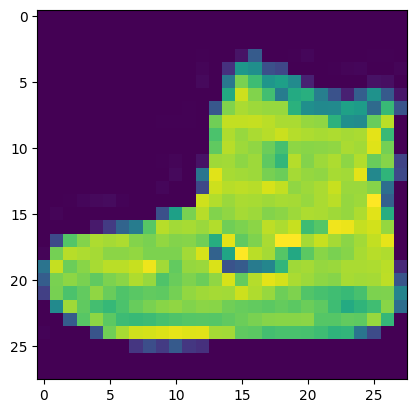

In [8]:
plt.imshow(image.squeeze()) # matplotlib requires (h,w) or (h,w,c) but not (c,h,w)

Text(0.5, 1.0, 'Ankle boot')

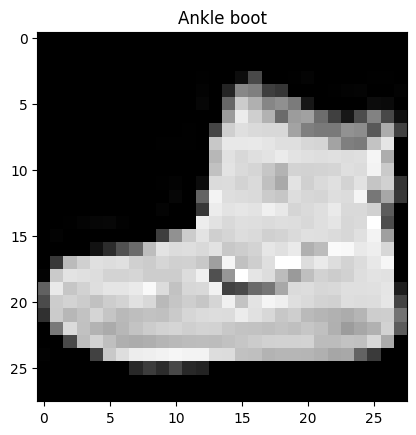

In [9]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])

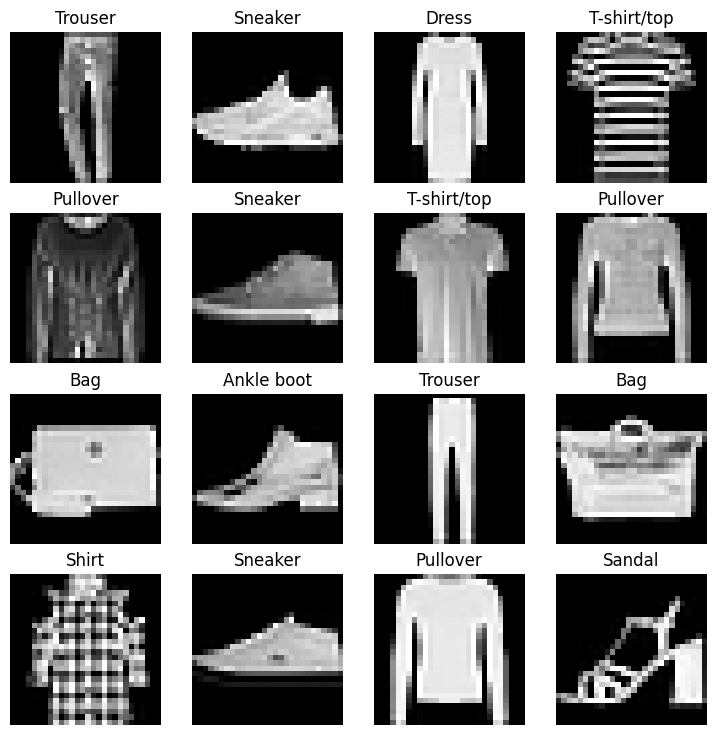

In [10]:
# plot more images
# torch.manual_seed(42)
plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  plt.subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [11]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

##prepare dataloader

right now our dataset is in the form of pytorch dataset

dataloader turns our dataset into a pyton itterable

more specifically, we want to turn our data into mini batches

In [12]:
train_dataloader=DataLoader(dataset=train_data,batch_size=32,shuffle=True)

test_dataloader=DataLoader(dataset=test_data,batch_size=32,shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ee857dbd3f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7ee857dbcf70>)

In [13]:
len(train_dataloader) #thus 1875 batches of 32 training samples

1875

In [14]:
len(test_dataloader) # thus 313 batches of approx 32 testing samples

313

In [15]:
#lets check whats inside the train data loader

train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.Size([1, 28, 28])


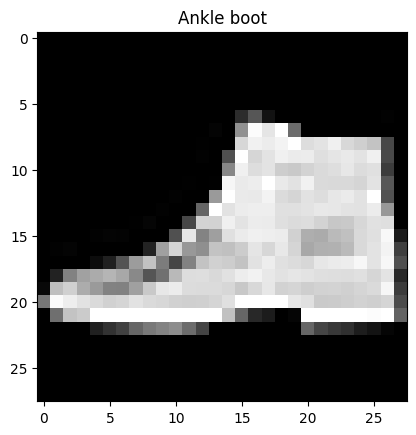

In [16]:
#show a sample
# torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
print(img.shape)


In [17]:
#building a baseline model

class FashionMNISTmodel0(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape,out_features=hidden_units),
      nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

torch.manual_seed(42)
model=FashionMNISTmodel0(input_shape=28*28,hidden_units=10,output_shape=len(class_names))
model


FashionMNISTmodel0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
model.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [19]:
torch.manual_seed(42)
dummy_x=torch.rand([1,1,28,28])
model(dummy_x)

tensor([[ 0.1813, -0.3193,  1.3691,  0.9185, -0.1709, -1.0997, -0.3299,  1.6366,
         -0.0506, -0.6301]], grad_fn=<AddmmBackward0>)

In [20]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [21]:
torch.manual_seed(42)
img,label=next(iter(train_dataloader))
y_pred=model(img)
y_pred.shape,label.shape
y_loss=loss_fn(y_pred,label)
y_loss

tensor(2.3665, grad_fn=<NllLossBackward0>)

In [22]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [23]:
from os import P_PID
import requests
import pathlib
from pathlib import Path

# download helper functions from learn pytorch repo

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

downloading helper_functions.py


In [24]:
from helper_functions import accuracy_fn

## creating a function to time our experiments

ML is very experimental

the 2 main things we often track is :

1.the models performance (loss and accuracy)

2.how fast it runs

note: usually model peromance and time taken by model our inversely related


In [25]:
from timeit import default_timer as Timer

def train_time(start:float,end:float):
  # """ prints the difference btw the strt and end time"""

  total_time=end-start
  print(f" Train time is: {total_time:.3f} seconds")
  return total_time


In [26]:
start_time=Timer()

end_time=Timer()

train_time(start_time,end_time)


 Train time is: 0.000 seconds


5.636399998820707e-05

# creating training loop and training a model on batches of data

In [27]:
import tqdm # a progress bar for epochs

from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start=Timer()
epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n------")
  train_loss,train_acc=0,0
  # add a loop to loop through our training batches
  for batch,(x,y) in enumerate(train_dataloader):
    model.train()

    # foward prop
    y_pred=model(x) # 1 batch of data is used on the model and we get preds of all 32 images

    # calculate loss
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    train_acc+=accuracy_fn(y,y_pred.argmax(dim=1))


    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # print out whats happening
    if batch%400==0:
      print(f"looked at {batch*len(x)}/{len(train_dataloader.dataset)} samples")

  train_loss/=len(train_dataloader)
  train_acc/=len(train_dataloader)


  ## testing
  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for x_test,y_test in test_dataloader:
      test_pred=model(x_test)

      test_loss+=loss_fn(test_pred,y_test)
      test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)
  print(f"\n train loss:{train_loss:.4f} | train acc:{train_acc:.4f} | test loss:{test_loss:.4f} | test acc:{test_acc:.4f} ")

#calculate train time

train_time_end=Timer()

train_time(start=train_time_start,end=train_time_end)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 train loss:0.5904 | train acc:79.1717 | test loss:0.5095 | test acc:82.0387 
Epoch:1
------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 train loss:0.4763 | train acc:83.3200 | test loss:0.4799 | test acc:83.1969 
Epoch:2
------
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 train loss:0.4550 | train acc:84.0517 | test loss:0.4766 | test acc:83.4265 
 Train time is: 59.498 seconds


59.498498246999986

In [28]:
# creating a function for predicting and eval our model not for training but only for test dataset
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy_fn):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for x,y in data_loader:

      y_pred=model(x)

      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y,y_pred.argmax(dim=1))

    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc }

model_results=eval_model(model,test_dataloader,loss_fn,accuracy_fn)
model_results



{'model_name': 'FashionMNISTmodel0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [43]:
torch.manual_seed(42)

class FashionMNISTmodelv1(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.linear_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()

    )

  def forward(self,x:torch.Tensor):
    return self.linear_stack(x)


torch.manual_seed(42)
model1=FashionMNISTmodelv1(input_shape=28*28,hidden_units=10,output_shape=len(class_names))
model1


FashionMNISTmodelv1(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [44]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model1.parameters(),lr=0.1)

In [45]:
## functionizing our train and test step

def train_step(model:nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:nn.Module,optimizer:torch.optim.Optimizer,accuracy_fn):
  train_loss,train_acc=0,0
    # add a loop to loop through our training batches
  for batch,(x,y) in enumerate(data_loader):
    model.train()

    # foward prop
    y_pred=model(x) # 1 batch of data is used on the model and we get preds of all 32 images

    # calculate loss
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    train_acc+=accuracy_fn(y,y_pred.argmax(dim=1))


    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train loss:{train_loss:.5f} | Train acc:{train_acc:.2f}% ")





In [46]:
def test_step(model:nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:nn.Module,accuracy_fn):
  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for x_test,y_test in data_loader:
      test_pred=model(x_test)

      test_loss+=loss_fn(test_pred,y_test)
      test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
  print(f" test loss:{test_loss:.5f} | test acc:{test_acc:.2f}% \n")

In [47]:
torch.manual_seed(42)
train_time_start=Timer()
epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n-------")
  train_step(model=model1,data_loader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn)
  test_step(model=model1,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)


train_time_end=Timer()

train_time(start=train_time_start,end=train_time_end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-------
Train loss:1.09199 | Train acc:61.34% 
 test loss:0.95636 | test acc:65.00% 

Epoch:1
-------
Train loss:0.78101 | Train acc:71.93% 
 test loss:0.72227 | test acc:73.91% 

Epoch:2
-------
Train loss:0.67027 | Train acc:75.94% 
 test loss:0.68500 | test acc:75.02% 

 Train time is: 35.378 seconds


35.37775582899985

In [50]:
model1_results=eval_model(model=model1,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model1_results

{'model_name': 'FashionMNISTmodelv1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [ ]:
# creating CNN

class FashionMNISTmodelv2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1=nn.Sequential()